Собственные зачения и собственные функции для осциляторного потенциала

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from math import e, sqrt, factorial, pi, floor
from functools import cache

In [70]:
h = 6.582119514e-16
m = 9.109e-31    
omega = 1e16
a = 1.5
x_min = -a
x_max = a
N = 10000

In [71]:
def psi(x, n):
    return 1 / sqrt(2**n * factorial(n)) * \
        (m * omega / (pi * h))**(1/4) * \
        e**(-(m * omega * x**2) / (2*h)) \
        * hermite(n, sqrt(m*omega/h)*x)

@cache
def hermite(n, x):
    res = 0
    for j in range(floor(n/2) + 1):
        res += (-1)**j * factorial(n) * (2*x)**(n-2*j) / (factorial(j) * factorial(n - 2*j))
    return res

def E(n):
    return h*omega*(n + 1/2)

E0 = 3.29
E1 = 9.87
E2 = 16.46
E3 = 23.04


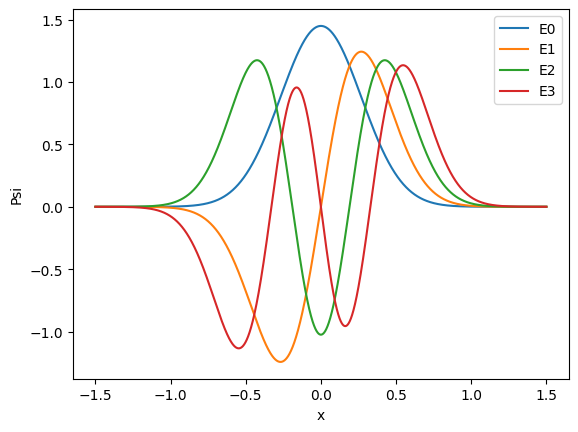

In [72]:
xs = np.linspace(x_min, x_max, N)
legend = []
for n in range(4):
    print(f'E{n} = {round(E(n), 2)}')
    ys = np.array([psi(x, n) for x in xs])
    plt.plot(xs, ys, label='n={}'.format(n))
    legend.append(f'E{n}')
    plt.xlabel('x')
    plt.ylabel('Psi')

plt.legend(legend)
plt.show()